In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Stuff is used here is explained in draft.ipynb.

In [8]:
#gets MNIST;
#i've stolen this function from George Hotz:
#https://github.com/geohot/ai-notebooks/blob/master/mnist_from_scratch.ipynb

def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()

X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

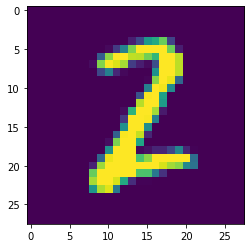

In [16]:
plt.imshow(X_test[256])

In [ ]:
def unm(m, n):
    matrix = np.random.uniform(-1, 1, size=(m,n))
    return matrix / np.sqrt(m*n)

relu = lambda x: np.maximum(x, 0.)

def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

def matrix_softmax(m):
    return np.apply_along_axis(softmax, 0, m)

def dm(v):
    l = len(v)
    m = np.zeros([l, l])
    np.fill_diagonal(m, v)
    return m

def grads(train, labels, W0, W1, b0, b1):
    
    x0 = train
    x1 = x0 * W0 + b0
    l1 = relu(x1)
    x2 = W1 @ l1 + b1
    l2 = softmax(x2)

    dloss_dx2 = (l2 - labels).T
    dx2_dl1 = W1
    dl1_dx1 = dm(l1>0)
    dx1_dW0 = W0
    dx2_dW1 = (l1.T)
    
    dloss_dW0 = ((dx2_dl1.T @ dloss_dx2.T) @ l1.T) @  dx1_dW0
    dloss_dW1 = dloss_dx2.T @ dx2_dW1
    dloss_db0 = ((dloss_dx2 @ dx2_dl1 @ dl1_dx1).T).sum(axis=1).reshape(-1,1)
    dloss_db1 = (dloss_dx2.T).sum(axis=1).reshape(-1,1)

    return (dloss_dW0, dloss_dW1, dloss_db0, dloss_db1)